(36, 36, 10000, 1, 2)
[16, 29]
DSDP Site 401 : misc_pH_Xa_full
pre_i  : 7.53 (7.36 - 7.75)
[7.36 7.53 7.75]
[7.14 7.3  7.51]
[-0.36 -0.23 -0.13]
delta_i: -0.23 (-0.13 - -0.36)


/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


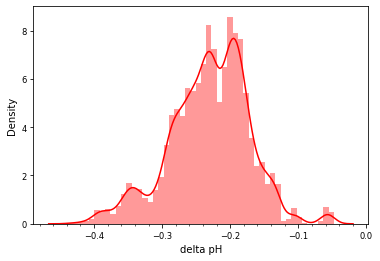

In [41]:
'''
inqury posterior from DA output using given paleo gps
'''
import sys
sys.path.append('../')
import os
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from DeepDA_lib import modules_nc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#from mpl_toolkits.basemap import Basemap, shiftgrid, cm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


# Location




site = 'New Jersey'
location_i = [-55.55, 38.45]

site = 'ODP Site 1263'
location_i = [-12, -37.6]

site = 'ODP Site 1209'
location_i = [-155.45, 28.35]  # ODP site 1209

site = 'DSDP Site 401'
location_i = [-10.95, 41.8] # DSDP 401

Xa_full_name_vari = 'misc_pH_Xa_full'

dum_lon_offset = -180.0
dum_imax = 36
dum_jmax = 36

binsn = 50
bcolor = 'r'
perclist = [2.5, 50, 97.5]

directory = '/Users/mingsongli/Documents/posterior/'
experiment = 'petmproxy3slices_v0.1.2.csv_petm31_v0.1.2_deep_20221209_All.noAc._bays_MC100_pHcor_frac0.98_Ca75_biogem_SatuBen_setLim'
experiment = 'petmproxy3slices_v0.1.2-w-hiatus.csv_petm31_v0.1.2_whiatus_deep_20221209_All.noAc._bays_MC100_pHcor_frac0.98_Ca75_biogem_SatuBen_setLim'

nc_shortname = '_loc_0_proxy_frac_0.98_Rscale_2.0_MC_all.nc'
nc_filename = directory + experiment + '/' + nc_shortname


Xa2d_full_i = Dataset(nc_filename).variables[Xa_full_name_vari][:]
print(Xa2d_full_i.shape)

dum_lon = location_i[0]
dum_lat = location_i[1]

lonlat = modules_nc.cal_find_ij(dum_lon,dum_lat,dum_lon_offset,dum_imax,dum_jmax)
# output [lon, lat]
# lon ranges from 0 (-180) to 35 (180), lat ranges from 0 (-90) to 35 (90)
print(lonlat)

pre_i   = Xa2d_full_i[lonlat[1], lonlat[0], :,0, 0]
peak_i  = Xa2d_full_i[lonlat[1], lonlat[0], :,0, 1]
delta_i = -pre_i + peak_i

plt.subplot(1,1,1)
bx = pd.Series(delta_i)            
ax = sns.distplot( bx, bins=binsn, label='Prior', color = bcolor)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Density')
ax.set_xlabel('delta pH')
ax.tick_params(labelsize='small')

np.set_printoptions(suppress=True, precision=2)

print(site + ' : ' + Xa_full_name_vari)
perc = np.percentile(pre_i,perclist)
print('pre_i  : ' + np.array2string(perc[1]) + ' (' + np.array2string(perc[0]) + ' - ' + np.array2string(perc[2]) + ')')
print(perc)
perc = np.percentile(peak_i,perclist)
#print('peak_i : ' + np.array2string(perc[1]) + ' (' + np.array2string(perc[0]) + ' - ' + np.array2string(perc[2]) + ')')
print(perc)
perc = np.percentile(delta_i,perclist)
print(perc)
print('delta_i: ' + np.array2string(perc[1]) + ' (' + np.array2string(perc[2]) + ' - ' + np.array2string(perc[0]) + ')')

plt.savefig(experiment +'_'+ Xa_full_name_vari +'_'+ site + '.pdf')

In [ ]:
ODP Site 1263 : misc_pH_Xa_full
pre_i  : 7.68 (7.5 - 7.89)
peak_i : 7.35 (7.19 - 7.56)
delta_i: -0.33 (-0.21 - -0.45)

ODP Site 1209 : misc_pH_Xa_full
pre_i  : 7.68 (7.49 - 7.89)
peak_i : 7.34 (7.18 - 7.55)
delta_i: -0.33 (-0.21 - -0.45)
    
DSDP Site 401 : misc_pH_Xa_full
pre_i  : 7.7 (7.51 - 7.91)
peak_i : 7.35 (7.19 - 7.56)
delta_i: -0.35 (-0.23 - -0.48)
    
New Jersey : misc_pH_Xa_full
pre_i  : 7.68 (7.49 - 7.9)
peak_i : 7.34 (7.18 - 7.55)
delta_i: -0.34 (-0.22 - -0.47)